# Yelp Data Challenge - Data Preprocessing


## Dataset Introduction

Website
[Yelp Dataset Challenge](https://www.yelp.com/dataset_challenge)

The Challenge Dataset:

    4.1M reviews and 947K tips by 1M users for 144K businesses
    1.1M business attributes, e.g., hours, parking availability, ambience.
    Aggregated check-ins over time for each of the 125K businesses
    200,000 pictures from the included businesses

Cities:

    U.K.: Edinburgh
    Germany: Karlsruhe
    Canada: Montreal and Waterloo
    U.S.: Pittsburgh, Charlotte, Urbana-Champaign, Phoenix, Las Vegas, Madison, Cleveland

Files:

    yelp_academic_dataset_business.json
    yelp_academic_dataset_checkin.json
    yelp_academic_dataset_review.json
    yelp_academic_dataset_tip.json
    yelp_academic_dataset_user.json

Notes on the Dataset

    Each file is composed of a single object type, one json-object per-line.


## Read data from file and load to Pandas DataFrame

**Warning**: Loading all the 1.8 GB data into Pandas at a time takes long time and a lot of memory!

In [42]:
import json
import pandas as pd

In [43]:
file_business, file_checkin, file_review, file_tip, file_user = [
    '/Users/xuejiwang/Downloads/yelp_dataset/yelp_academic_dataset_business.json',
    '/Users/xuejiwang/Downloads/yelp_dataset/yelp_academic_dataset_checkin.json',
    '/Users/xuejiwang/Downloads/yelp_dataset/yelp_academic_dataset_review.json',
    '/Users/xuejiwang/Downloads/yelp_dataset/yelp_academic_dataset_tip.json',
    '/Users/xuejiwang/Downloads/yelp_dataset/yelp_academic_dataset_user.json',
]

#### Business data
##### Open the file

In [44]:
f = open(file_business)
first_line = f.readline()
first_line_json = json.loads(first_line)

print(type(first_line))
print(first_line)
print(type(first_line_json))
print(first_line_json)

<class 'str'>
{"business_id":"Apn5Q_b6Nz61Tq4XzPdf9A","name":"Minhas Micro Brewery","neighborhood":"","address":"1314 44 Avenue NE","city":"Calgary","state":"AB","postal_code":"T2E 6L6","latitude":51.0918130155,"longitude":-114.031674872,"stars":4.0,"review_count":24,"is_open":1,"attributes":{"BikeParking":"False","BusinessAcceptsCreditCards":"True","BusinessParking":"{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}","GoodForKids":"True","HasTV":"True","NoiseLevel":"average","OutdoorSeating":"False","RestaurantsAttire":"casual","RestaurantsDelivery":"False","RestaurantsGoodForGroups":"True","RestaurantsPriceRange2":"2","RestaurantsReservations":"True","RestaurantsTakeOut":"True"},"categories":"Tours, Breweries, Pizza, Restaurants, Food, Hotels & Travel","hours":{"Monday":"8:30-17:0","Tuesday":"11:0-21:0","Wednesday":"11:0-21:0","Thursday":"11:0-21:0","Friday":"11:0-21:0","Saturday":"11:0-21:0"}}

<class 'dict'>
{'business_id': 'Apn5Q_b6Nz61Tq4XzPdf9A'

#### Business Data

In [45]:
with open(file_business) as f:
    df_business = pd.DataFrame(json.loads(line) for line in f)

In [46]:
df_business.shape

(188593, 15)

In [47]:
type(df_business)

pandas.core.frame.DataFrame

In [48]:
df_business.shape

(188593, 15)

In [49]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 15 columns):
address         188593 non-null object
attributes      162807 non-null object
business_id     188593 non-null object
categories      188052 non-null object
city            188593 non-null object
hours           143791 non-null object
is_open         188593 non-null int64
latitude        188587 non-null float64
longitude       188587 non-null float64
name            188593 non-null object
neighborhood    188593 non-null object
postal_code     188593 non-null object
review_count    188593 non-null int64
stars           188593 non-null float64
state           188593 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 21.6+ MB


#### Checkin Data

In [13]:
with open(file_checkin) as f:
    df_checkin = pd.DataFrame(json.loads(line) for line in f)
df_checkin.head(2)

,business_id,time
0,7KPBkxAOEtb3QeIL9PEErg,"{'Fri-0': 2, 'Sat-0': 1, 'Sun-0': 1, 'Wed-0': ..."
1,kREVIrSBbtqBhIYkTccQUg,"{'Mon-13': 1, 'Thu-13': 1, 'Sat-16': 1, 'Wed-1..."


In [14]:
df_checkin.shape

(157075, 2)

#### Tip Data

In [50]:
 with open(file_tip) as f:
     df_tip = pd.DataFrame(json.loads(line) for line in f)
 df_tip.head(2)

,business_id,date,likes,text,user_id
0,tJRDll5yqpZwehenzE2cSg,2012-07-15,0,Get here early enough to have dinner.,zcTZk7OG8ovAmh_fenH21g
1,2ThtBbeDqFkVi6LugUOcVA,2012-11-25,0,Don't use them! Double charged my boyfriend an...,M5n8mMFoeXjnJEV2gxyGGA


#### User Data

In [51]:
 with open(file_user) as f:
    df_user = pd.DataFrame(json.loads(line) for line in f)
 df_user.head(2)

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,2.0,0,0,0,0,0,0,0,0,0,...,0,None,0,None,0,Susan,1,0,lzlZwIpuSWXEnNS91wxjHw,2015-09-28
1,5.0,0,0,0,0,0,0,0,0,0,...,0,None,0,None,0,Daipayan,2,0,XvLBr-9smbI0m_a7dXtB7w,2015-09-05


## Filter data by city and category

#### Create filters

* create filters that selects business 
    * that are located in "Las Vegas"
    * that contains "Restaurants" in their category (You may need to filter null categories first)

In [17]:
df_business.city.unique().tolist()

['Calgary',
 'Henderson',
 'Montréal',
 'Phoenix',
 'Toronto',
 'Mississauga',
 'Avondale',
 'Pittsburgh',
 'Markham',
 'Las Vegas',
 'Cleveland',
 'Monticello',
 'Streetsboro',
 'Sun Prairie',
 'Cave Creek',
 'Middlefield',
 'Medina',
 'Gilbert',
 'Upper St Clair',
 'Avalon',
 'North York',
 'Monroeville',
 'Concord',
 'Charlotte',
 'Tolleson',
 'Mesa',
 'Kent',
 'South Euclid',
 'Surprise',
 'Scottsdale',
 'Woodbridge',
 'Thornhill',
 'Tempe',
 'Gastonia',
 'North Las Vegas',
 'Rocky River',
 'Glendale',
 'Richmond Hill',
 'North Randall',
 'Peoria',
 'Richfield',
 'Laval',
 'Brooklyn',
 'Garfield Heights',
 'Landau',
 'las vegas',
 'Goodyear',
 'Mentor',
 'Amherst',
 'Matthews',
 'Chagrin Falls',
 'Montreal',
 'Ajax',
 'Laveen Village',
 'Etobicoke',
 'Lakewood',
 'Scarborough',
 'Madison',
 'Oakville',
 'Stouffville',
 'Chandler',
 'Monroe',
 'Pleasant Hills',
 'Brunswick',
 'Fountain Hills',
 'East Gwillimbury',
 'Mount Holly',
 'Longueuil',
 'Fort Mill',
 'Swissvale',
 'Litchfiel

In [52]:
df_business['city'].value_counts()

Las Vegas                28865
Phoenix                  18633
Toronto                  18233
Charlotte                 9204
Scottsdale                8822
Calgary                   7384
Pittsburgh                6804
Mesa                      6239
Montréal                  6045
Henderson                 4815
Tempe                     4492
Chandler                  4272
Madison                   3509
Cleveland                 3506
Glendale                  3469
Gilbert                   3397
Mississauga               2954
Peoria                    1868
Markham                   1699
North Las Vegas           1508
Champaign                 1243
Scarborough               1175
North York                1140
Surprise                  1119
Richmond Hill              978
Concord                    975
Brampton                   929
Vaughan                    853
Goodyear                   827
Etobicoke                  760
                         ...  
St-Jean-sur-Richelieu        1
Moon Twp

In [53]:
# Create Pandas DataFrame filters
# To create a list to check if city is Vegas
city_isVegas = df_business['city'] == 'Las Vegas'

city_isVegas.head(10)

#pass

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: city, dtype: bool

In [55]:
# to see column name of dataframe
list(df_business), df_business.shape

(['address',
  'attributes',
  'business_id',
  'categories',
  'city',
  'hours',
  'is_open',
  'latitude',
  'longitude',
  'name',
  'neighborhood',
  'postal_code',
  'review_count',
  'stars',
  'state'],
 (188593, 15))

In [56]:
# filer that contains "Restaurants" in their category (filter null categories first)
# To check if category column is null
category_not_null =  -df_business['categories'].isnull()

In [57]:
# Select restaurant
category_isRestaurant = df_business['categories'].apply(str).str.contains('Restaurants')
#category_isRestaurant,len(category_isRestaurant)

In [58]:
# Create filtered DataFrame, and name it df_filtered
df_filtered = df_business[city_isVegas & category_not_null & category_isRestaurant]
df_filtered.head(10)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
19,"3940 Martin Luther King Blvd, Ste 101","{'BikeParking': 'True', 'BusinessAcceptsCredit...",vJIuDBdu01vCA8y1fwR1OQ,"American (Traditional), Food, Bakeries, Restau...",Las Vegas,"{'Tuesday': '11:0-18:0', 'Wednesday': '11:0-18...",0,36.192284,-115.159272,CakesbyToi,,89106,3,1.5,NV
32,2255 N Rampart Blvd,"{'Alcohol': 'none', 'Ambience': '{'romantic': ...",kgffcoxT6BQp-gJ-UQ7Czw,"Fast Food, Restaurants, Sandwiches",Las Vegas,"{'Monday': '9:0-21:0', 'Tuesday': '9:0-21:0', ...",1,36.201794,-115.281981,Subway,Summerlin,89128,13,2.5,NV
33,2227 N Rampart Blvd,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'ro...",0jtRI7hVMpQHpUVtUy4ITw,"Beer, Wine & Spirits, Italian, Food, American ...",Las Vegas,"{'Monday': '7:0-14:30', 'Tuesday': '7:0-19:0',...",1,36.201990,-115.283122,Omelet House Summerlin,Summerlin,89128,242,4.0,NV
61,7930 W Tropical Pkwy,"{'HasTV': 'False', 'RestaurantsReservations': ...",JJEx5wIqs9iGGATOagE8Sg,"Mexican, Restaurants",Las Vegas,None,0,36.271169,-115.267759,Baja Fresh Mexican Grill,Centennial,89149,4,2.0,NV
141,4505 E Bonanza Rd,"{'Alcohol': 'none', 'Ambience': '{'romantic': ...",zhxnD7J5_sCrKSw5cwI9dQ,"Chicken Wings, Restaurants, Fast Food",Las Vegas,"{'Monday': '10:0-23:0', 'Tuesday': '10:0-23:0'...",1,36.173140,-115.077945,Popeyes Louisiana Kitchen,Sunrise,89110,16,1.5,NV
143,"560 N. Nellis Blvd, Ste E1","{'Alcohol': 'none', 'Ambience': '{'romantic': ...",2kWrSFkIes_d2BMg4YrRtA,"Restaurants, Pizza",Las Vegas,"{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",1,36.169353,-115.061694,Pizza Hut,Sunrise,89110,19,2.5,NV
145,3480 S Maryland Pkwy,"{'BusinessAcceptsCreditCards': 'True', 'GoodFo...",6llKs7K_tn8ChXcIM-oTvg,"Japanese, Restaurants",Las Vegas,None,1,36.125934,-115.135253,Sansei Japan,Eastside,89169,3,4.5,NV
197,2505 E Tropicana Ave,"{'Alcohol': 'none', 'Ambience': '{'romantic': ...",YV9GVfmDSDM7HSV0jVdTOA,"Restaurants, Salad, Fast Food, Mexican",Las Vegas,"{'Monday': '10:0-23:0', 'Tuesday': '10:0-23:0'...",1,36.099671,-115.116144,El Pollo Loco,Southeast,89121,34,3.0,NV
203,4910 S Maryland Pkwy,"{'Alcohol': 'none', 'Ambience': '{'romantic': ...",F7OsiFk9aLZtqZczA84xpw,"Southern, Chicken Wings, Fast Food, American (...",Las Vegas,"{'Monday': '10:0-23:0', 'Tuesday': '10:0-23:0'...",1,36.100395,-115.136307,Popeyes Louisiana Kitchen,Southeast,89119,56,2.0,NV
249,2201 S Fort Apache Rd,"{'Alcohol': 'full_bar', 'Ambience': '{'romanti...",XeDLyY2a7nZ3IEY4RYslXA,"American (New), Restaurants, Food, Breweries, ...",Las Vegas,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,36.147496,-115.298066,Chicago Brewing Company,Westside,89117,446,3.5,NV


In [59]:
df_filtered.shape, df_business.shape

((6148, 15), (188593, 15))

#### Keep relevant columns

* only keep some useful columns
    * business_id
    * name
    * categories
    * stars

In [60]:
selected_features = [u'business_id', u'name', u'categories', u'stars']

In [61]:
# Make a DataFrame that contains only the abovementioned columns, and name it as df_selected_business
df_selected_business = df_filtered[selected_features]

pass

In [62]:
# Rename the column name "stars" to "avg_stars" to avoid naming conflicts with review dataset
# df_selected_business = df_selected_business.rename(columns = {'stars':'avg_stars'}, inplace = True)
df_selected_business = df_selected_business.rename(columns = {'stars':'avg_stars'})
df_selected_business.head()


,business_id,name,categories,avg_stars
19,vJIuDBdu01vCA8y1fwR1OQ,CakesbyToi,"American (Traditional), Food, Bakeries, Restau...",1.5
32,kgffcoxT6BQp-gJ-UQ7Czw,Subway,"Fast Food, Restaurants, Sandwiches",2.5
33,0jtRI7hVMpQHpUVtUy4ITw,Omelet House Summerlin,"Beer, Wine & Spirits, Italian, Food, American ...",4.0
61,JJEx5wIqs9iGGATOagE8Sg,Baja Fresh Mexican Grill,"Mexican, Restaurants",2.0
141,zhxnD7J5_sCrKSw5cwI9dQ,Popeyes Louisiana Kitchen,"Chicken Wings, Restaurants, Fast Food",1.5


In [63]:
# Inspect DataFrame
df_selected_business.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6148 entries, 19 to 188567
Data columns (total 4 columns):
business_id    6148 non-null object
name           6148 non-null object
categories     6148 non-null object
avg_stars      6148 non-null float64
dtypes: float64(1), object(3)
memory usage: 240.2+ KB


In [64]:
df_selected_business.shape

(6148, 4)

In [65]:
df_selected_business.describe()

,avg_stars
count,6148.000000
mean,3.477066
std,0.808917
min,1.000000
25%,3.000000
50%,3.500000
75%,4.000000
max,5.000000


#### Save results to csv files

In [66]:
# Save as selected_business.csv for next task
df_selected_business.to_csv('/Users/xuejiwang/Downloads/yelp_dataset/selected_business.csv',sep = ',', encoding = 'utf-8')

In [67]:
# Check the dataset to see if it works fine
df_test = pd.read_csv('/Users/xuejiwang/Downloads/yelp_dataset/selected_business.csv',encoding = 'utf-8')
df_test.head()

,Unnamed: 0,business_id,name,categories,avg_stars
0,19,vJIuDBdu01vCA8y1fwR1OQ,CakesbyToi,"American (Traditional), Food, Bakeries, Restau...",1.5
1,32,kgffcoxT6BQp-gJ-UQ7Czw,Subway,"Fast Food, Restaurants, Sandwiches",2.5
2,33,0jtRI7hVMpQHpUVtUy4ITw,Omelet House Summerlin,"Beer, Wine & Spirits, Italian, Food, American ...",4.0
3,61,JJEx5wIqs9iGGATOagE8Sg,Baja Fresh Mexican Grill,"Mexican, Restaurants",2.0
4,141,zhxnD7J5_sCrKSw5cwI9dQ,Popeyes Louisiana Kitchen,"Chicken Wings, Restaurants, Fast Food",1.5


In [68]:
df_test.shape

(6148, 5)

### Use the "business_id" column to filter review data

* We want to make a DataFrame that contain and only contain the reviews about the business entities we just obtained

#### Load review dataset

In [69]:
with open(file_review) as f:
    df_review = pd.DataFrame(json.loads(line) for line in f)
df_review.head(2)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g


In [70]:
df_review.shape

(5996996, 9)

#### Prepare dataframes to be joined, - on business_id

In [71]:
# Prepare the business dataframe and set index to column "business_id", and name it as df_left
df_left = df_selected_business.set_index('business_id')
df_left.head()

,name,categories,avg_stars
business_id,,,
vJIuDBdu01vCA8y1fwR1OQ,CakesbyToi,"American (Traditional), Food, Bakeries, Restau...",1.5
kgffcoxT6BQp-gJ-UQ7Czw,Subway,"Fast Food, Restaurants, Sandwiches",2.5
0jtRI7hVMpQHpUVtUy4ITw,Omelet House Summerlin,"Beer, Wine & Spirits, Italian, Food, American ...",4.0
JJEx5wIqs9iGGATOagE8Sg,Baja Fresh Mexican Grill,"Mexican, Restaurants",2.0
zhxnD7J5_sCrKSw5cwI9dQ,Popeyes Louisiana Kitchen,"Chicken Wings, Restaurants, Fast Food",1.5


In [72]:
# Prepare the review dataframe and set index to column "business_id", and name it as df_right
df_right = df_review.set_index('business_id')
df_right.head()

,cool,date,funny,review_id,stars,text,useful,user_id
business_id,,,,,,,,
iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g
pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g
jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,Terrible. Dry corn bread. Rib tips were all fa...,3,msQe1u7Z_XuqjGoqhB0J5g
elqbBhBfElMNSrjFqW3now,0,2011-02-25,0,Er4NBWCmCD4nM8_p1GRdow,2,Back in 2005-2007 this place was my FAVORITE t...,2,msQe1u7Z_XuqjGoqhB0J5g
Ums3gaP2qM3W1XcA5r6SsQ,0,2014-09-05,0,jsDu6QEJHbwP2Blom1PLCA,5,Delicious healthy food. The steak is amazing. ...,0,msQe1u7Z_XuqjGoqhB0J5g


#### Join! and reset index

Use **inner join** to match business and review table on business_id 
such that each restaurant has their review

In [74]:
# Join df_left and df_right. What type of join?
df_joined = df_left.join(df_right, how = 'inner')

In [75]:
df_joined.shape

(1053072, 11)

In [76]:
df_joined.head(5)

,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
business_id,,,,,,,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2014-02-25,0,8eEp26oqTXmuIjVUJpLXHw,3,It was a real up and down evening.\nApps - BBQ...,0,AdxhlxXSGjRsCQxG6ZjfTw
--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2017-02-14,0,VETXTwMw6qxzOVDlXfe6Tg,5,went for dinner tonight. Amazing my husband ha...,0,ymlnR8UeFvB4FZL56tCZsA
--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2013-12-19,0,NQt645IJwa5ADM26UQ-jlA,5,we are a repeat customer-- best service - Thx ...,0,TMqFvYbWqs8BnjLsEXZjvQ
--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2013-12-02,2,G9TSEZ8BfuSmcf5xy_qAfA,3,"Thanksgiving dinner with the family, ok food ...",5,KmubWHd-t2d3dxLZ13tBAA
--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2015-01-01,0,6prMgAjp2LZjuxRvmrFDIQ,4,We were seated promptly for our 5:30 p.m. rese...,0,bMFqD4beGrt_LjNGG_7xng


#### After join on business_id, reset the index

In [77]:
# reset the index 
# After join on business_id, reset the index
df_joined.reset_index(inplace = True)
df_joined.head()

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2014-02-25,0,8eEp26oqTXmuIjVUJpLXHw,3,It was a real up and down evening.\nApps - BBQ...,0,AdxhlxXSGjRsCQxG6ZjfTw
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2017-02-14,0,VETXTwMw6qxzOVDlXfe6Tg,5,went for dinner tonight. Amazing my husband ha...,0,ymlnR8UeFvB4FZL56tCZsA
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2013-12-19,0,NQt645IJwa5ADM26UQ-jlA,5,we are a repeat customer-- best service - Thx ...,0,TMqFvYbWqs8BnjLsEXZjvQ
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2013-12-02,2,G9TSEZ8BfuSmcf5xy_qAfA,3,"Thanksgiving dinner with the family, ok food ...",5,KmubWHd-t2d3dxLZ13tBAA
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2015-01-01,0,6prMgAjp2LZjuxRvmrFDIQ,4,We were seated promptly for our 5:30 p.m. rese...,0,bMFqD4beGrt_LjNGG_7xng


#### We further filter data by date, e.g. keep comments from last 2 years

* Otherwise your laptop may crush on memory when running machine learning algorithms
* Purposefully ignoring the reviews made too long time ago

In [78]:
list(df_joined)

['business_id',
 'name',
 'categories',
 'avg_stars',
 'cool',
 'date',
 'funny',
 'review_id',
 'stars',
 'text',
 'useful',
 'user_id']

In [79]:
# Make a filter that selects date after 2015-01-20
isAfter20150120 = df_joined['date'] > u'2015-01-20'


In [80]:
# Filter the joined DataFrame and name it as df_final
df_final = df_joined[isAfter20150120]
df_final.head()

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2017-02-14,0,VETXTwMw6qxzOVDlXfe6Tg,5,went for dinner tonight. Amazing my husband ha...,0,ymlnR8UeFvB4FZL56tCZsA
6,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2017-12-04,0,S8-8uZ7fa5YbjnEtaW15ng,5,This was an amazing dinning experience! ORDER ...,0,9pSSL6X6lFpY3FCRLEH3og
14,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2016-08-22,1,1nK5w0VNfDlnR3bOz13dJQ,5,My husband and I went there for lunch on a Sat...,1,gm8nNoA3uB4In5o_Hxpq3g
15,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2016-09-13,0,N1Z93BthdJ7FT2p5S22jIA,3,Went for a nice anniversary dinner. Researched...,0,CEtidlXNyQzgJSdF1ubPFw
17,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2015-02-02,0,_Uwp6FO1X-avE9wqTMC59w,5,This place is first class in every way. Lobste...,0,-Z7Nw2UF7NiBSAzfXNA_XA


#### Take a glance at the final dataset

* Do more EDA here as you like!

In [81]:
import matplotlib.pyplot as plt

% matplotlib inline

In [82]:
# calculate counts of reviews per business entity, and plot it
df_final.head()

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2017-02-14,0,VETXTwMw6qxzOVDlXfe6Tg,5,went for dinner tonight. Amazing my husband ha...,0,ymlnR8UeFvB4FZL56tCZsA
6,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2017-12-04,0,S8-8uZ7fa5YbjnEtaW15ng,5,This was an amazing dinning experience! ORDER ...,0,9pSSL6X6lFpY3FCRLEH3og
14,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2016-08-22,1,1nK5w0VNfDlnR3bOz13dJQ,5,My husband and I went there for lunch on a Sat...,1,gm8nNoA3uB4In5o_Hxpq3g
15,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2016-09-13,0,N1Z93BthdJ7FT2p5S22jIA,3,Went for a nice anniversary dinner. Researched...,0,CEtidlXNyQzgJSdF1ubPFw
17,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2015-02-02,0,_Uwp6FO1X-avE9wqTMC59w,5,This place is first class in every way. Lobste...,0,-Z7Nw2UF7NiBSAzfXNA_XA


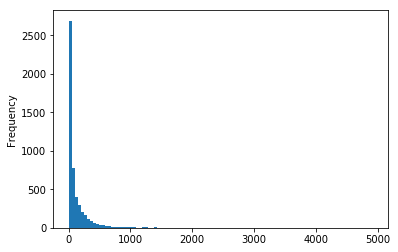

In [83]:
df_final['business_id'].value_counts().plot.hist(bins = 100)

In [84]:
plt.show()

## Save preprocessed dataset to csv file


In [85]:
df_final.to_csv('/Users/xuejiwang/Downloads/yelp_dataset/last_2_years_restaurant_reviews.csv',\
         index = False, encoding = 'utf-8')